<a href="https://colab.research.google.com/github/masterz963/stock/blob/main/stock_price_predition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers




In [ ]:
stock_data = yf.download('TCS', start='2013-01-01', end='2021-10-01')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-11-01,35.000000,37.000000,32.099998,36.200001,33.839130,14667600
2013-11-04,36.799999,36.799999,34.689999,35.349998,33.044563,1586600
2013-11-05,35.110001,35.500000,34.820000,35.349998,33.044563,337700
2013-11-06,35.610001,36.490002,35.610001,35.900002,33.558697,549600
2013-11-07,36.799999,36.799999,34.119999,35.310001,33.007175,883700


In [ ]:
r=stock_data.shape[0]

Text(0, 0.5, 'Prices (₹)')

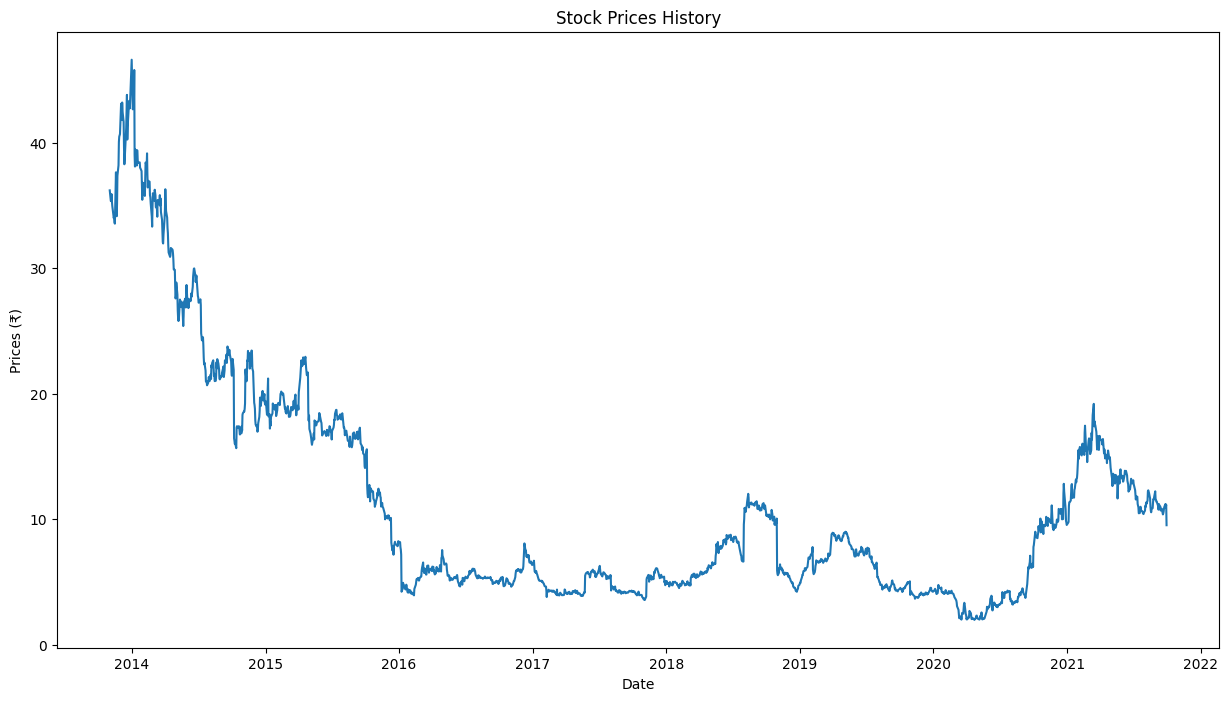

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices (₹)')

In [ ]:
close_prices = stock_data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)
r,training_data_len,r-training_data_len

(1992, 1594, 398)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
scaled_data

array([[0.76669656],
       [0.74764675],
       [0.74764675],
       ...,
       [0.20058269],
       [0.2052891 ],
       [0.16875841]])

In [ ]:
#train

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])



x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#test
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
#converts and reshape

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#LSTM
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
1534/1534 [==============================] - 79s 48ms/step - loss: 0.0013
Epoch 2/3
1534/1534 [==============================] - 67s 43ms/step - loss: 6.8421e-04
Epoch 3/3
1534/1534 [==============================] - 66s 43ms/step - loss: 3.7586e-04


In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(rmse)
model.save('lstm and cnn.h5')

13/13 [==============================] - 1s 40ms/step
0.1834172663377158


<ipython-input-13-300ab8b19275>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


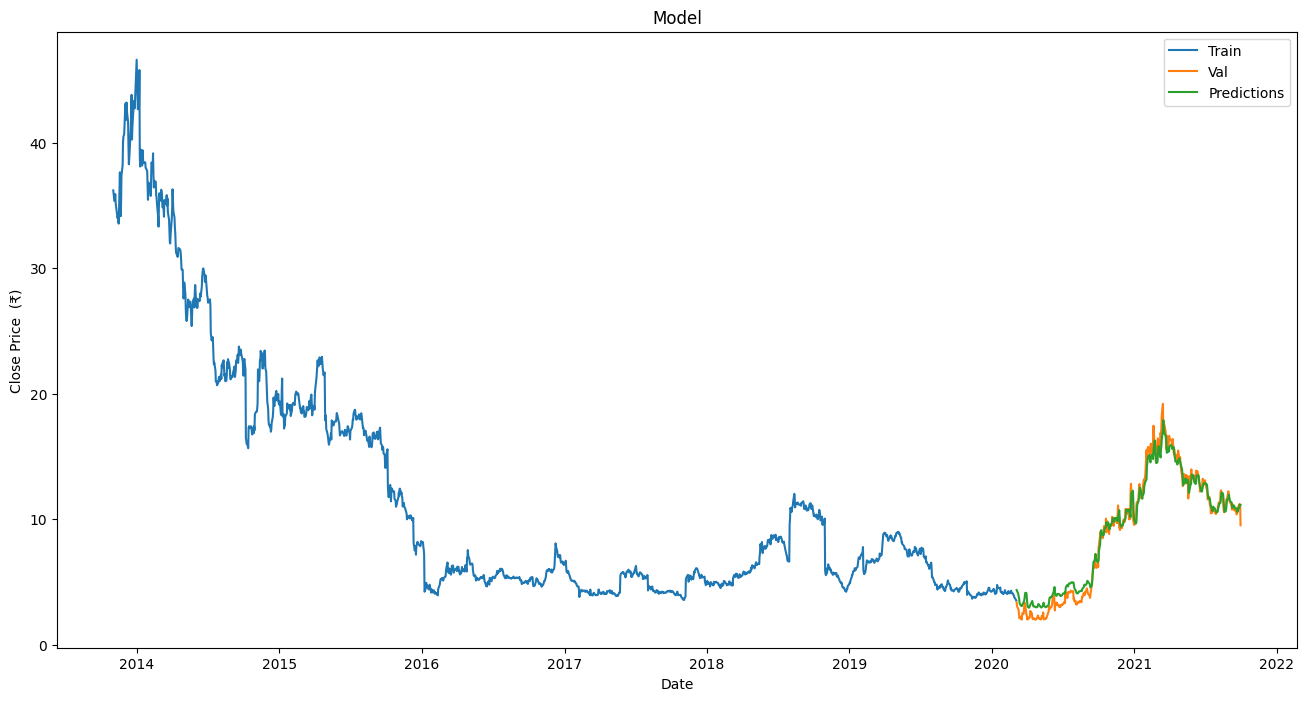

In [ ]:
data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price  (₹)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import *
stock =stock_data

window_size = 50
week = 7
X = []
Y = []

for i in range(0 , len(stock) - window_size -1 , 1):
    first = stock.iloc[i, 4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((stock.iloc[i + j, 4] - first) / first)
    temp2.append((stock.iloc[i +window_size, 4] - first) / first)

    X.append(np.array(temp).reshape(50, 1))
    Y.append(np.array(temp2).reshape(1,1))
train_X,test_X,train_label,test_label = train_test_split(X, Y, test_size=0.1,shuffle=False)
len_t = len(train_X)

len(train_X),len(test_X)

(1746, 195)

In [ ]:
#converts numpy array
train_X = np.array(train_X)
test_X = np.array(test_X)
train_label = np.array(train_label)
test_label = np.array(test_label)
train_X = train_X.reshape(train_X.shape[0],1,50,1)
test_X = test_X.reshape(test_X.shape[0],1,50,1)

In [ ]:
model = Sequential()
model.add(TimeDistributed(Conv1D(128, kernel_size=1, activation='relu', input_shape=(None,50,1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(256, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(512, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(200,return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

In [ ]:

model.compile(optimizer='RMSprop', loss='mse')
model.fit(train_X, train_label, validation_data=(test_X,test_label), epochs=3,batch_size=1,shuffle =False)
print(model.evaluate(test_X,test_label))



predicted  = model.predict(test_X)


test_label = (test_label[:,0])
predicted = np.array(predicted[:,0]).reshape(-1,1)
for j in range(len_t , len_t + len(test_X)):
    temp =stock.iloc[j,4]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp



Epoch 1/3
1746/1746 [==============================] - 136s 72ms/step - loss: 0.0100 - val_loss: 0.0458
Epoch 2/3
1746/1746 [==============================] - 125s 71ms/step - loss: 0.0093 - val_loss: 0.0370
Epoch 3/3
7/7 [==============================] - 3s 34ms/step - loss: 0.0449
0.044929083436727524
7/7 [==============================] - 2s 19ms/step


<ipython-input-25-15b22ff3766d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


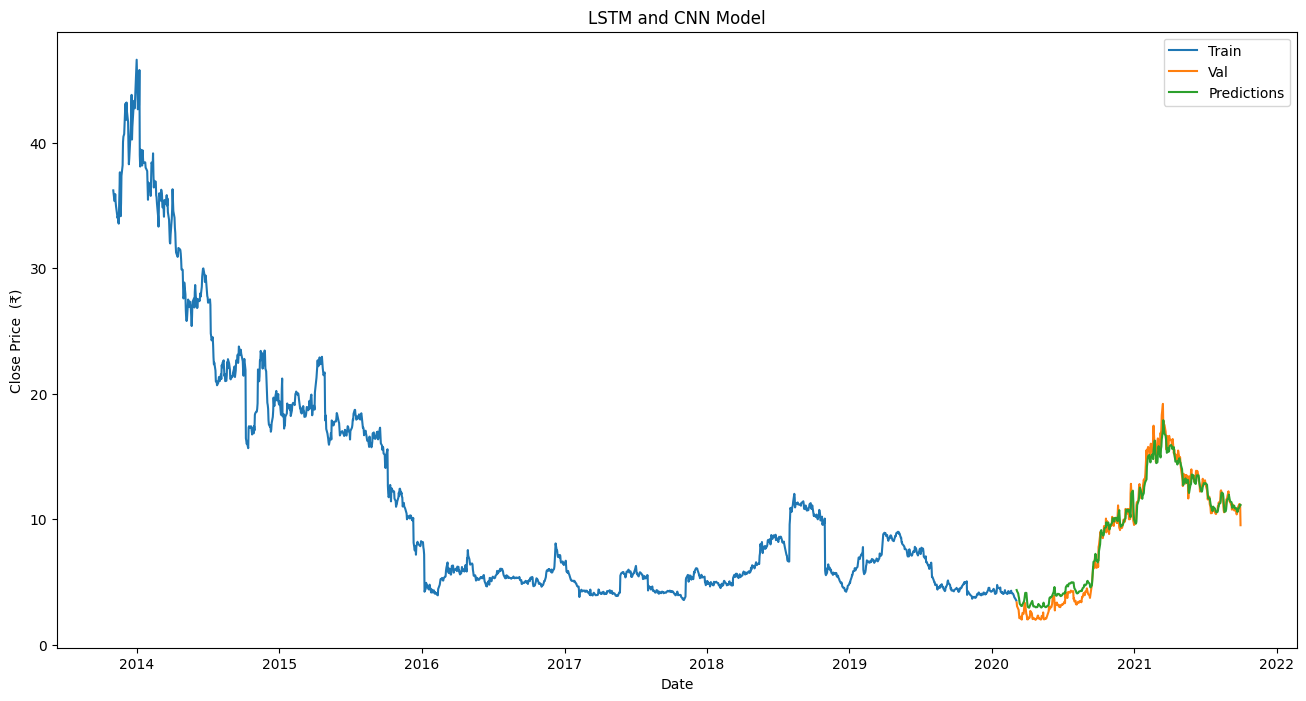

In [ ]:
data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('LSTM and CNN Model')
plt.xlabel('Date')
plt.ylabel('Close Price  (₹)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()